In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.metrics import confusion_matrix,roc_curve,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import  PCA

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df
diabetes_df['Outcome']
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# drop unnecessary columns and output variable

In [3]:
y = diabetes_df['Outcome']
diabetes_df.drop(columns = 'Outcome', inplace = True)


In [4]:
na_df = pd.DataFrame({'col_name':diabetes_df.columns,'Na_count':diabetes_df.isnull().sum(),'Na_PC':diabetes_df.isnull().sum()/diabetes_df.shape[0]*100})
na_df[na_df['Na_PC']>50]

,col_name,Na_count,Na_PC


In [7]:
len(np.unique(diabetes_df['Age']))

52

In [8]:
cols_to_drop=[]

for col in diabetes_df.columns:
    if len(np.unique(diabetes_df[col]))== diabetes_df.shape[0] or len(np.unique(diabetes_df[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

[]

#  train_test split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(diabetes_df,y,test_size=0.2,random_state=32)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
196,1,105,58,0,0,24.3,0.187,21
22,7,196,90,0,0,39.8,0.451,41
137,0,93,60,25,92,28.7,0.532,22
469,6,154,78,41,140,46.1,0.571,27
627,0,132,78,0,0,32.4,0.393,21
...,...,...,...,...,...,...,...,...
403,9,72,78,25,0,31.6,0.280,38
88,15,136,70,32,110,37.1,0.153,43
310,6,80,66,30,0,26.2,0.313,41
555,7,124,70,33,215,25.5,0.161,37


#  fill missing values after split

In [7]:
# no missing values in the dataframe

# scaling continous variables

In [10]:
con_cols = [col for col in X_train.columns if X_train[col].dtype == 'int64' or X_train[col].dtype =='float64']
std_scaler = StandardScaler()
for col in con_cols:
    X_train[col] = std_scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col] = std_scaler.transform(np.array(X_test[col]).reshape(-1,1))



In [13]:
con_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
cat_cols

[]

# one hot encoding categorical variables

In [9]:

#one_hot_train = pd.get_dummies(X_train[[col for col in X_train.columns if X_train[col].dtype == 'object']])
X_train #  no categorical variables

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
196,-0.845746,-0.461164,-0.614666,-1.291753,-0.695109,-1.015558,-0.844897,-1.037890
22,0.924554,2.390123,1.079394,-1.291753,-0.695109,0.992016,-0.055284,0.652018
137,-1.140796,-0.837158,-0.508787,0.277323,0.157428,-0.445666,0.186984,-0.953395
469,0.629504,1.074144,0.444122,1.281531,0.602230,1.807998,0.303631,-0.530918
627,-1.140796,0.384822,0.444122,-1.291753,-0.695109,0.033562,-0.228759,-1.037890
...,...,...,...,...,...,...,...,...
403,1.514654,-1.495147,0.444122,0.277323,-0.695109,-0.070055,-0.566738,0.398532
88,3.284955,0.510154,0.020607,0.716664,0.324229,0.642310,-0.946589,0.821009
310,0.629504,-1.244485,-0.191151,0.591138,-0.695109,-0.769468,-0.468036,0.652018
555,0.924554,0.134160,0.020607,0.779427,1.297234,-0.860133,-0.922661,0.314037


# calculating VIF (multicollinearity)

In [10]:

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,Pregnancies,1.436181
1,Glucose,1.270918
2,BloodPressure,1.171218
3,SkinThickness,1.465009
4,Insulin,1.419250
5,BMI,1.256666
6,DiabetesPedigreeFunction,1.090876
7,Age,1.639723


# logistic regression for categorical output variable

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)   #train the model on training data

print('train score =',logreg.score(X_train,y_train))
print('test score =',logreg.score(X_test,y_test))

train score = 0.7703583061889251
test score = 0.7792207792207793


In [12]:
test_predictions = logreg.predict(X_test)
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [13]:
train_predictions = logreg.predict(X_train)
train_predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
probability = logreg.predict_proba(X_test) 
pos_probability = logreg.predict_proba(X_test)[::,1]
pos_probability 

array([0.49482035, 0.2320597 , 0.41937825, 0.10593217, 0.42502855,
       0.0770873 , 0.40955566, 0.68540507, 0.81962666, 0.06195265,
       0.25021619, 0.05201126, 0.08351135, 0.01381404, 0.08488812,
       0.09911817, 0.46935888, 0.0760953 , 0.56851473, 0.30348347,
       0.30561127, 0.35853527, 0.24673791, 0.60282261, 0.24400881,
       0.10124066, 0.88206466, 0.07772146, 0.09788569, 0.12468132,
       0.55946494, 0.58957472, 0.26041413, 0.35247837, 0.5433313 ,
       0.2096599 , 0.79049909, 0.0196142 , 0.20323627, 0.76976074,
       0.83457058, 0.60849039, 0.66676343, 0.42403239, 0.18643434,
       0.16693355, 0.94952302, 0.39739914, 0.72866161, 0.36412641,
       0.45893449, 0.55921757, 0.0939689 , 0.02174375, 0.42207358,
       0.71626104, 0.52159545, 0.14177042, 0.05357139, 0.28057229,
       0.13165075, 0.38284877, 0.05049166, 0.15133068, 0.731375  ,
       0.04356372, 0.11339152, 0.1733553 , 0.19643706, 0.18358834,
       0.22631882, 0.18336593, 0.88623277, 0.60046208, 0.16848

In [15]:
confusion_matrix(y_test,test_predictions)

array([[85, 14],
       [20, 35]], dtype=int64)

In [16]:
comparision_df = pd.DataFrame({'Actuals':y_test,'predictions':test_predictions})
comparision_df

,Actuals,predictions
642,1,0
695,1,0
453,0,0
565,0,0
99,1,0
...,...,...
335,0,1
307,0,0
383,0,0
662,1,1


In [17]:
fpr,tpr,thresholds = roc_curve(y_test,pos_probability )

In [18]:
#test scores
print('precision score',precision_score(y_test,test_predictions))
print('recall score',recall_score(y_test,test_predictions))
print('test f1_score :',f1_score(y_test,test_predictions))

precision score 0.7142857142857143
recall score 0.6363636363636364
test f1_score : 0.673076923076923


In [19]:
#train scores
print('precision score',precision_score(y_train,train_predictions))
print('recall score',recall_score(y_train,train_predictions))
print('train f1_score :',f1_score(y_train,train_predictions))

precision score 0.7307692307692307
recall score 0.5352112676056338
train f1_score : 0.6178861788617886


Text(0, 0.5, 'True Positive rate')

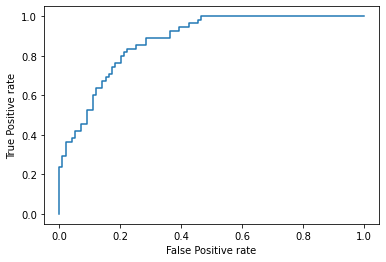

In [20]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')

In [21]:
roc_auc_score(y_test,test_predictions)

0.7474747474747474

# Lasso Regularization

In [22]:
lasso = Lasso(alpha = 2.0)
lasso.fit(X_train,y_train)
lasso_coef_df = pd.DataFrame({'coefficients':lasso.coef_})
#len(lasso_coef_df[lasso_coef_df['coefficients']==0])
lasso_coef_df

,coefficients
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0


# Ridge Regularization

In [23]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)
ridge_coef_df = pd.DataFrame({'coefficients':ridge.coef_})
#len(ridge_coef_df[ridge_coef_df['coefficients']==0])
ridge_coef_df

,coefficients
0,0.074699
1,0.180871
2,-0.038548
3,0.015828
4,-0.041413
5,0.095935
6,0.055268
7,0.030242


# DECISION TREE

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dt_predictions = dtc.predict(X_test)
dt_predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [25]:
confusion_matrix(y_test,dt_predictions)

array([[82, 17],
       [21, 34]], dtype=int64)

In [26]:
print('decision tree precision score',precision_score(y_test,dt_predictions))
print('decision tree recall score',recall_score(y_test,dt_predictions))
print('decision tree f1_score :',f1_score(y_test,dt_predictions))
print('decision tree roc_auc_score',roc_auc_score(y_test,dt_predictions))

decision tree precision score 0.6666666666666666
decision tree recall score 0.6181818181818182
decision tree f1_score : 0.6415094339622642
decision tree roc_auc_score 0.7232323232323232


# Random Forest

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_predictions = dtc.predict(X_test)
rf_predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [28]:
confusion_matrix(y_test,rf_predictions)

array([[82, 17],
       [21, 34]], dtype=int64)

In [29]:
print('random_forest precision score',precision_score(y_test,rf_predictions))
print('random_forest recall score',recall_score(y_test,rf_predictions))
print('random_forest f1_score :',f1_score(y_test,rf_predictions))
print('random forest roc_auc_score',roc_auc_score(y_test,rf_predictions))

random_forest precision score 0.6666666666666666
random_forest recall score 0.6181818181818182
random_forest f1_score : 0.6415094339622642
random forest roc_auc_score 0.7232323232323232


# HyperParameter Tuning for Decision Tree

# GridSearch CV

In [30]:
hp_dtc_dict = {
               'max_depth':[5,6,7,8],
               'min_samples_split':[6,7,8,9],
               'max_leaf_nodes':[5,6,7,8],
               'min_samples_leaf':[7,8,9,10]
              }
gcv_dtc=GridSearchCV(dtc,hp_dtc_dict,cv=5,scoring='f1')
gcv_dtc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_leaf_nodes': [5, 6, 7, 8],
                         'min_samples_leaf': [7, 8, 9, 10],
                         'min_samples_split': [6, 7, 8, 9]},
             scoring='f1')

In [31]:
print('the best score is ',gcv_dtc.best_score_)

the best score is  0.5937091987860945


In [32]:
#gcv_dtc.score(X_train,y_train)

In [33]:
#print('the best score is ',gcv_dtc.best_score_) #f1 score

In [34]:
print('the best estimates for the parameters are ',gcv_dtc.best_estimator_)
print('the best scores are ',gcv_dtc.best_score_)  # accuracy
print('the best parameters are ',gcv_dtc.best_params_)

the best estimates for the parameters are  DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7, min_samples_leaf=7,
                       min_samples_split=6)
the best scores are  0.5937091987860945
the best parameters are  {'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 7, 'min_samples_split': 6}


In [35]:
gcv_dtc.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

# Randomized Search CV

In [36]:
rdcv_dtc=RandomizedSearchCV(dtc,hp_dtc_dict,cv=5,scoring='f1',n_iter=500)
rdcv_dtc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   param_distributions={'max_depth': [5, 6, 7, 8],
                                        'max_leaf_nodes': [5, 6, 7, 8],
                                        'min_samples_leaf': [7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9]},
                   scoring='f1')

In [37]:
rdcv_dtc.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [38]:
print('the best estimates for the parameters are ',rdcv_dtc.best_estimator_)
print('the best scores are ',rdcv_dtc.best_score_)
print('the best parameters are ',rdcv_dtc.best_params_)

the best estimates for the parameters are  DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7, min_samples_leaf=7,
                       min_samples_split=6)
the best scores are  0.5937091987860945
the best parameters are  {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 5}


# HyperParameter Tuning for Random Forest

# Gridsearch CV

In [39]:
hp_rfc_dict = {
               'max_depth':[5,6,7,8],
               'min_samples_split':[6,7,8,9],
               'max_leaf_nodes':[5,6,7,8],
               'min_samples_leaf':[7,8,9,10],
               'n_estimators':[50,100,150,200]
              }
gcv_rfc=GridSearchCV(rfc,hp_rfc_dict,cv=3,scoring='f1')
gcv_rfc.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_leaf_nodes': [5, 6, 7, 8],
                         'min_samples_leaf': [7, 8, 9, 10],
                         'min_samples_split': [6, 7, 8, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [40]:
print('the best estimates for the parameters are ',gcv_rfc.best_estimator_)
print('the best score is ',gcv_rfc.best_score_)
print('the best parameters are ',gcv_rfc.best_params_)

the best estimates for the parameters are  RandomForestClassifier(max_depth=6, max_leaf_nodes=8, min_samples_leaf=7,
                       min_samples_split=6)
the best score is  0.6041679532185967
the best parameters are  {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 100}


In [41]:
gcv_rfc.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

# Randomized search CV

In [42]:
rdcv_rfc=RandomizedSearchCV(rfc,hp_rfc_dict,cv=3,scoring='f1',n_iter=100)
rdcv_rfc.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [5, 6, 7, 8],
                                        'max_leaf_nodes': [5, 6, 7, 8],
                                        'min_samples_leaf': [7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='f1')

In [43]:
rdcv_rfc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [44]:
print('the best estimates for the parameters are ',rdcv_rfc.best_estimator_)
print('the best score is ',rdcv_rfc.best_score_)
print('the best parameters are ',rdcv_rfc.best_params_)

the best estimates for the parameters are  RandomForestClassifier(max_depth=7, max_leaf_nodes=8, min_samples_leaf=8,
                       min_samples_split=9, n_estimators=50)
the best score is  0.6046638692193373
the best parameters are  {'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_leaf_nodes': 8, 'max_depth': 7}


# Adaboost Classifier

In [11]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
ab_predictions = abc.predict(X_test)
ab_predictions


array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [46]:
confusion_matrix(y_test,ab_predictions)

array([[86, 13],
       [16, 39]], dtype=int64)

In [47]:
print('Adaboost precision score',precision_score(y_test,ab_predictions))
print('Adaboost recall score',recall_score(y_test,ab_predictions))
print('Adaboost f1_score :',f1_score(y_test,ab_predictions))
print('adaboost roc_auc_score',roc_auc_score(y_test,ab_predictions))

Adaboost precision score 0.75
Adaboost recall score 0.7090909090909091
Adaboost f1_score : 0.7289719626168225
adaboost roc_auc_score 0.788888888888889


# Hyperparameter Tuning - Adaboost

# GridSearch CV

In [18]:
hp_abc_dict = {
               'n_estimators':[50,100,150],
                'learning_rate':[0.5,1.0,1.5]
              }
gcv_abc=GridSearchCV(abc,hp_abc_dict,cv=5,scoring='f1')
gcv_abc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [52]:
gcv_abc.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [54]:
print('the best estimates for the parameters are ',gcv_abc.best_estimator_)
print('f1 score is ',gcv_abc.best_score_)
print('the best parameters are ',gcv_abc.best_params_)

the best estimates for the parameters are  AdaBoostClassifier()
f1 score is  0.6401798797577525
the best parameters are  {'learning_rate': 1.0, 'n_estimators': 50}


# Randomized Search CV

In [13]:
rdcv_abc=RandomizedSearchCV(abc,hp_abc_dict,cv=3,scoring='f1',n_iter=100)
rdcv_abc.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.5, 1.0, 1.5],
                                        'n_estimators': [50, 100, 150]},
                   scoring='f1')

In [14]:
rdcv_abc.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [15]:
print('the best estimates for the parameters are ',rdcv_abc.best_estimator_)
print('the f1 score is ',rdcv_abc.best_score_)
print('the best parameters are ',rdcv_abc.best_params_)

the best estimates for the parameters are  AdaBoostClassifier()
the f1 score is  0.6167929292929294
the best parameters are  {'n_estimators': 50, 'learning_rate': 1.0}


# Gradient Boost Classifier

In [20]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gb_predictions = gbc.predict(X_test)
gb_predictions

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [50]:
confusion_matrix(y_test,gb_predictions)

array([[85, 14],
       [16, 39]], dtype=int64)

In [51]:
print('Gradient Boost precision score',precision_score(y_test,ab_predictions))
print('Gradient Boost recall score',recall_score(y_test,ab_predictions))
print('Gradient Boost f1_score :',f1_score(y_test,ab_predictions))
print('Gradient Boost roc_auc_score',roc_auc_score(y_test,ab_predictions))

Gradient Boost precision score 0.75
Gradient Boost recall score 0.7090909090909091
Gradient Boost f1_score : 0.7289719626168225
Gradient Boost roc_auc_score 0.788888888888889


# Hyperparameter Tuning-Gradient Boost

# GridSearch Cv

In [21]:
hp_gbc_dict = {
               'max_depth':[5,6,7,8],
               'min_samples_split':[6,7,8,9],
               'max_leaf_nodes':[5,6,7,8],
               'min_samples_leaf':[7,8,9,10],
               'n_estimators':[50,100,150,200],
               'learning_rate':[0.1,0.2,0.3]
              }
gcv_gbc=GridSearchCV(gbc,hp_gbc_dict,cv=3,scoring='f1')
gcv_gbc.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'max_leaf_nodes': [5, 6, 7, 8],
                         'min_samples_leaf': [7, 8, 9, 10],
                         'min_samples_split': [6, 7, 8, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [22]:
gcv_gbc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [24]:
print('the best estimates for the parameters are ',gcv_gbc.best_estimator_)
print('the f1 score is ',gcv_gbc.best_score_)
print('the best parameters are ',gcv_gbc.best_params_)

the best estimates for the parameters are  GradientBoostingClassifier(max_depth=5, max_leaf_nodes=7, min_samples_leaf=9,
                           min_samples_split=6, n_estimators=50)
the f1 score is  0.6192092798534276
the best parameters are  {'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 50}


# Randomized Search CV

In [25]:
rdcv_gbc=RandomizedSearchCV(gbc,hp_gbc_dict,cv=3,scoring='f1',n_iter=100)
rdcv_gbc.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [5, 6, 7, 8],
                                        'max_leaf_nodes': [5, 6, 7, 8],
                                        'min_samples_leaf': [7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='f1')

In [26]:
rdcv_gbc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [27]:
print('the best estimates for the parameters are ',rdcv_gbc.best_estimator_)
print('the f1 score is ',rdcv_gbc.best_score_)
print('the best parameters are ',rdcv_gbc.best_params_)

the best estimates for the parameters are  GradientBoostingClassifier(max_depth=5, max_leaf_nodes=7, min_samples_leaf=9,
                           min_samples_split=8, n_estimators=50)
the f1 score is  0.6192092798534276
the best parameters are  {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_leaf_nodes': 7, 'max_depth': 5, 'learning_rate': 0.1}


# Support Vector Machine

In [25]:
svm = SVC()
svm.fit(X_train,y_train)
svm_predictions = svm.predict(X_test)
svm_predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [26]:
confusion_matrix(y_test,svm_predictions)

array([[86, 13],
       [20, 35]], dtype=int64)

In [27]:
print('Support Vector Machine precision score',precision_score(y_test,svm_predictions))
print('Support Vector Machine recall score',recall_score(y_test,svm_predictions))
print('GSupport Vector Machine f1_score :',f1_score(y_test,svm_predictions))
print('Support Vector Machine roc_auc_score',roc_auc_score(y_test,svm_predictions))

Support Vector Machine precision score 0.7291666666666666
Support Vector Machine recall score 0.6363636363636364
GSupport Vector Machine f1_score : 0.6796116504854369
Support Vector Machine roc_auc_score 0.7525252525252525


# HyperParameter Tuning- SVM

# Grid Search CV

In [31]:
hp_svm_dict = {
               'C':[0.6,0.8,1.0],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid']
              }
gcv_svm = GridSearchCV(svm,hp_svm_dict,cv=3,scoring='f1')
gcv_svm.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.6, 0.8, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [34]:
svm_predicts = gcv_svm.predict(X_test)
svm_predicts

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [35]:
print('the best estimates for the parameters are ',gcv_svm.best_estimator_)
print('the f1 score is ',gcv_svm.best_score_)
print('the best parameters are ',gcv_svm.best_params_)

the best estimates for the parameters are  SVC(C=0.8, kernel='linear')
the f1 score is  0.6010695132799594
the best parameters are  {'C': 0.8, 'kernel': 'linear'}


# Randomized Search CV

In [36]:
rdcv_svm = RandomizedSearchCV(svm,hp_svm_dict,cv=3,scoring='f1',n_iter=100)
rdcv_svm.fit(X_train,y_train)
rdcv_svm.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [37]:
print('the best estimates for the parameters are ',rdcv_svm.best_estimator_)
print('the f1 score is ',rdcv_svm.best_score_)
print('the best parameters are ',rdcv_svm.best_params_)

the best estimates for the parameters are  SVC(C=0.8, kernel='linear')
the f1 score is  0.6010695132799594
the best parameters are  {'kernel': 'linear', 'C': 0.8}
